# Índice

1. [Cargado de los datos](#data)
1. [Entrenamiento del *Causal Tree*](#tree)

<a id='data'></a>
# 1. Cargado de los datos

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [13]:
#Read main data to DataFrame
cleaned_df = pd.read_csv('processed_data/cleaned_df.csv', index_col=0)  

In [14]:
treatment = 'tr'
outcome = 'z_all_06'
covariates = list(cleaned_df.columns)
covariates.remove(treatment)
covariates.remove(outcome)

In [15]:
X=cleaned_df.drop(["z_all_06","tr"], axis=1).copy()
y=cleaned_df.z_all_06
t=cleaned_df.tr

<a id='tree'></a>
# 2. Entrenamiento del *Causal Tree*

Se entrena un *Causal Tree* sobre el dataset, con la variable *z_all_06* como *outcome*  para generar subgrupos que maximicen la diferencia intergrupal de CATE.

In [16]:
#definim una escala de color comu per tots els nostres trees
cmap = cm.RdYlGn
norm = Normalize(vmin=-0.5, vmax=0.5)
#cuncio que convertir RGB a hex
def rgb_to_hex(rgb):
    for i in range(3):
        return ('#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)))

def replace_color (dot_data, values):
    inici=0
    for i in range(len(values)):
        index=dot_data[inici:].find("fillcolor=")+11+inici
        color=dot_data[index:index+7]
        inici=index+7
        old=color
        new=rgb_to_hex(cmap(norm(values[i]))[:-1])
        dot_data=dot_data.replace(old, new, 1)
    return dot_data

In [17]:
from econml.grf import CausalForest

causal_tree=CausalForest(n_estimators=1, subforest_size=1, max_samples=1., min_samples_leaf=30, max_depth=3,
                         max_features=len(X.columns), criterion="het", inference=False)
causal_tree.fit(X,t,y)

CausalForest(criterion='het', inference=False, max_depth=3, max_features=45,
             max_samples=1.0, min_samples_leaf=30, n_estimators=1,
             subforest_size=1)

In [18]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(causal_tree[0], out_file=None, 
                                feature_names=X.columns, filled=True, rounded=True)

cmap_values=[row[0,0] for row in causal_tree[0].tree_.value]
dot_data=replace_color(dot_data, cmap_values)

#Draw graph
causal_tree_im = graphviz.Source(dot_data, format="png")
causal_tree_im= graphviz.Source(dot_data_ind, format="png", filename="causal_tree") 
causal_tree_im.render(directory='assets/results')

'assets\\results\\causal_tree.png'

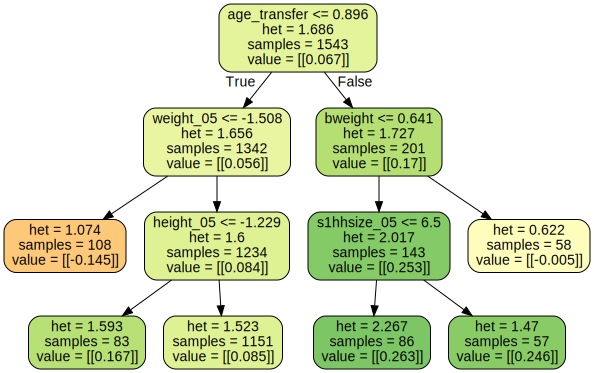

In [19]:
causal_tree_im

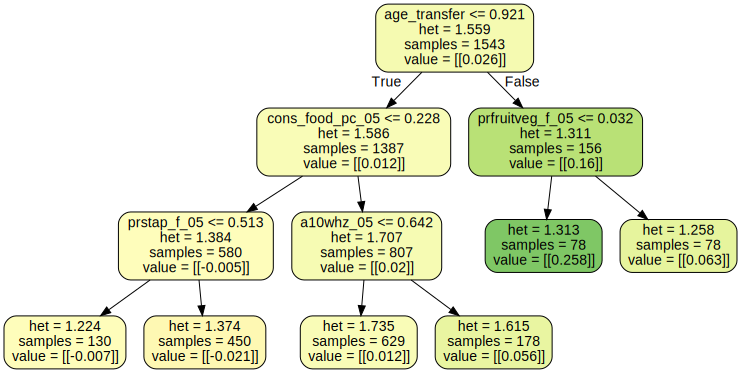

In [20]:
individual_df=cleaned_df[['s1age_head_05', 's1hhsize_05', 's1hhsz_undr5_05', 's1hhsz_5_14_05',
       's1hhsz_15_24_05', 's1hhsz_25_64_05', 's1hhsz_65plus_05',
       's1male_head_05', 's2mother_inhs_05', 's3ap5_rooms_h_05',
       's3ap23_stime_h_05', 's3ap24_htime_h_05', 's3ap25_hqtime_h_05',
       's3atoilet_hh_05', 's3awater_access_hh_05', 's3aelectric_hh_05',
       's4p6_vitamina_i_05', 's4p7_parasite_i_05', 's11ownland_hh_05',
       'cons_food_pc_05', 'cons_tot_pc_05', 'height_05', 'a10whz_05',
       'weight_05', 'yrsedfath', 'age_transfer', 'bweight',
       's4p7_parasite_i_06', 'male', 'ed_mom', 'vitamiron_06', 'propfood_05', 'prstap_f_05',
       'pranimalprot_f_05', 'prfruitveg_f_05']].copy()

X1=individual_df.copy()

causal_tree_ind=CausalForest(n_estimators=1, subforest_size=1, max_samples=1., min_samples_leaf=50, max_depth=3,
                         max_features=len(individual_df.columns), criterion="het", inference=False)
causal_tree_ind .fit(X1,t,y)

dot_data_ind = tree.export_graphviz(causal_tree_ind[0], out_file=None, 
                                feature_names=individual_df.columns, filled=True,rounded=True)

cmap_values=[row[0,0] for row in causal_tree_ind[0].tree_.value]
dot_data_ind=replace_color(dot_data_ind, cmap_values)
#Draw graph
causal_ind_im= graphviz.Source(dot_data_ind, format="png", filename="causal_tree_ind") 
causal_ind_im.render(directory='assets/results')
causal_ind_im